<a href="https://colab.research.google.com/github/chinwejoseph/JDA_NPOWER_CANADA/blob/main/Analyzing_Historical_stock_Revenue_Data_and_Building_a_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# The make_graph function has been modified to use Matplotlib for static graphs. Earlier, it used Plotly to generate interactive dashboards, which caused issues when uploading the notebook in the MARK assignment submission.



import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

In [5]:
gme = yf.Ticker("GME")

In [6]:
gme_data = gme.history(period="max")

In [7]:
gme_data.reset_index(inplace=True)
display(gme_data.head())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [11]:
tesla = yf.Ticker("TSLA")

In [12]:
tesla_data = tesla.history(period="max")

In [13]:
tesla_data.reset_index(inplace=True)
display(tesla_data.head())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [15]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [16]:
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all('table')

tesla_revenue_table = None # Initialize to None

for table in tables:
    if ("Tesla Quarterly Revenue" in str(table)):
        tesla_revenue_table = table
        break

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

if tesla_revenue_table is not None: # Check if the table was found
    for row in tesla_revenue_table.tbody.find_all("tr"):
        col = row.find_all("td")
        if (col != []):
            date = col[0].text
            revenue = col[1].text.replace("$", "").replace(",", "")
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([{"Date":date, "Revenue":revenue}])], ignore_index=True)
else:
    print("Warning: 'Tesla Quarterly Revenue' table not found in the HTML data. The resulting DataFrame will be empty.")


NameError: name 'tesla_revenue_table' is not defined

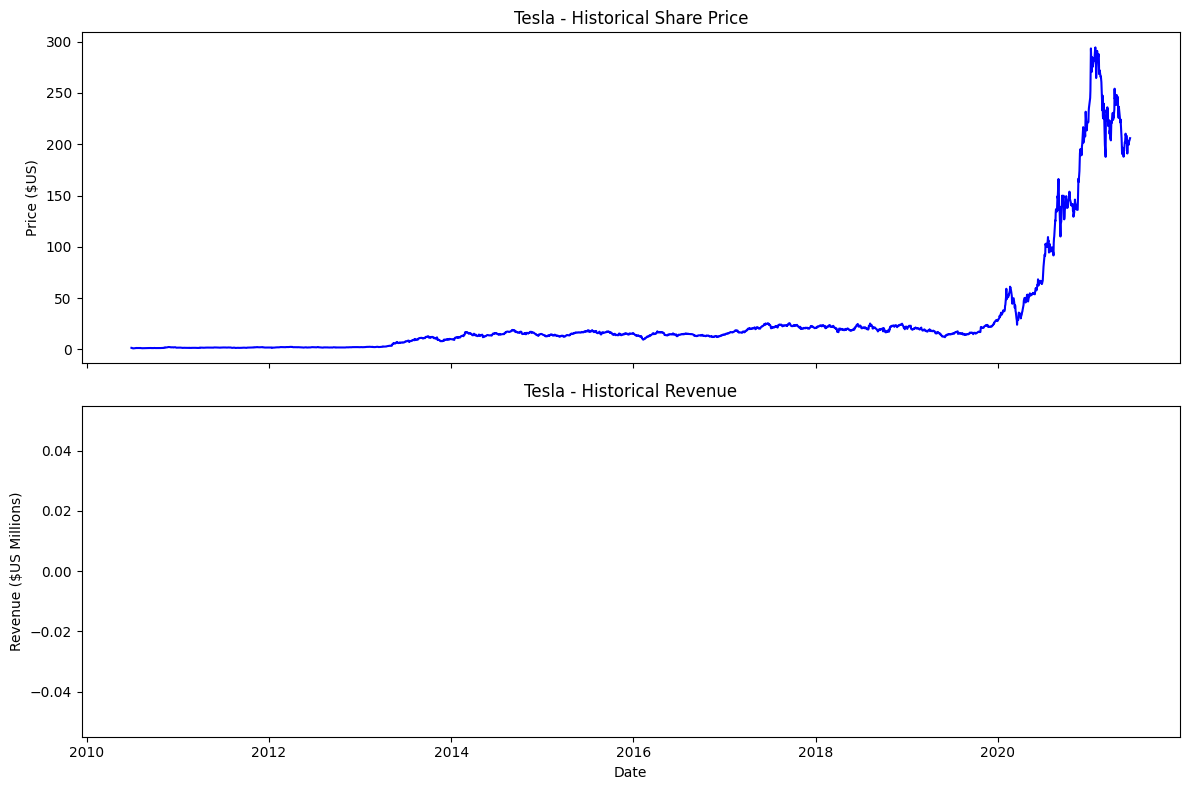

In [27]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

In [28]:
display(tesla_data.head())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [17]:
tesla_financials = tesla.quarterly_financials

# Extracting revenue data. The exact key might vary, common ones are 'Total Revenue' or 'Sales Revenue'.
# Let's inspect the financial data structure first if 'Total Revenue' is not found directly.
if 'Total Revenue' in tesla_financials.index:
    tesla_revenue = tesla_financials.loc['Total Revenue'].reset_index()
    tesla_revenue.columns = ['Date', 'Revenue']
    # yfinance dates are usually datetime objects, convert to string if necessary for consistency
    # or ensure previous plotting functions can handle datetime
    tesla_revenue['Date'] = tesla_revenue['Date'].dt.strftime('%Y-%m-%d')
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(str) # Convert to string to match previous format if needed
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '').str.replace(',', '')
else:
    print("Warning: 'Total Revenue' not found in Tesla's quarterly financials. Please inspect `tesla_financials` for available keys.")
    tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

display(tesla_revenue.head())

,Date,Revenue
0,2025-12-31,24901000000.0
1,2025-09-30,28095000000.0
2,2025-06-30,22496000000.0
3,2025-03-31,19335000000.0
4,2024-12-31,25707000000.0


In [18]:
# Further cleaning if yfinance provides 'None' or empty strings
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

display(tesla_revenue.head())

,Date,Revenue
0,2025-12-31,24901000000.0
1,2025-09-30,28095000000.0
2,2025-06-30,22496000000.0
3,2025-03-31,19335000000.0
4,2024-12-31,25707000000.0


In [20]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
display(tesla_revenue.head())

,Date,Revenue
0,2025-12-31,24901000000.0
1,2025-09-30,28095000000.0
2,2025-06-30,22496000000.0
3,2025-03-31,19335000000.0
4,2024-12-31,25707000000.0


In [21]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [23]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
display(tesla_revenue.head())

,Date,Revenue


In [24]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [26]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
display(tesla_revenue.head())

,Date,Revenue


In [30]:
soup = BeautifulSoup(html_data, "html.parser")
print("HTML data successfully parsed into a BeautifulSoup object.")

HTML data successfully parsed into a BeautifulSoup object.


In [29]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
print(f"Length of downloaded html_data: {len(html_data)} characters")

Length of downloaded html_data: 64779 characters


In [14]:
display(tesla_data.head())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [32]:
tables = soup.find_all('table')

tesla_revenue_table = None
for table in tables:
    if ("Tesla Quarterly Revenue" in str(table)):
        tesla_revenue_table = table
        break

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

if tesla_revenue_table is not None:
    for row in tesla_revenue_table.tbody.find_all("tr"):
        col = row.find_all("td")
        if (col != []):
            date = col[0].text
            revenue = col[1].text.replace("$", "").replace(",", "")
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([{"Date":date, "Revenue":revenue}])], ignore_index=True)
else:
    print("Warning: 'Tesla Quarterly Revenue' table not found in the HTML data.")

tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
display(tesla_revenue.head())

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [33]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3152827612.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)


In [34]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [36]:
display(tesla_revenue.tail())

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [39]:
display(gme_data.head())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [40]:
display(gme_data.head())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [42]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text
print(f"Length of downloaded html_data_2: {len(html_data_2)} characters")

Length of downloaded html_data_2: 88703 characters


In [49]:
soup = BeautifulSoup(html_data_2, "html.parser")
print("HTML data 2 successfully parsed into a BeautifulSoup object.")

HTML data 2 successfully parsed into a BeautifulSoup object.


In [50]:
tables = soup.find_all('table')

gme_revenue_table = None
for table in tables:
    if ("GameStop Quarterly Revenue" in str(table)):
        gme_revenue_table = table
        break

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

if gme_revenue_table is not None:
    for row in gme_revenue_table.tbody.find_all("tr"):
        col = row.find_all("td")
        if (col != []):
            date = col[0].text
            revenue = col[1].text.replace("$", "").replace(",", "")
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame([{"Date":date, "Revenue":revenue}])], ignore_index=True)
else:
    print("Warning: 'GameStop Quarterly Revenue' table not found in the HTML data 2.")

gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
display(gme_revenue.head())

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


In [51]:
soup = BeautifulSoup(html_data_2, "html.parser")
print("HTML data 2 successfully parsed into a BeautifulSoup object.")

HTML data 2 successfully parsed into a BeautifulSoup object.


In [52]:
tables = soup.find_all('table')

gme_revenue_table = None
for table in tables:
    if ("GameStop Quarterly Revenue" in str(table)):
        gme_revenue_table = table
        break

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

if gme_revenue_table is not None:
    for row in gme_revenue_table.tbody.find_all("tr"):
        col = row.find_all("td")
        if (col != []):
            date = col[0].text
            revenue = col[1].text.replace("$", "").replace(",", "")
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame([{"Date":date, "Revenue":revenue}])], ignore_index=True)
else:
    print("Warning: 'GameStop Quarterly Revenue' table not found in the HTML data 2.")

gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
display(gme_revenue.head())

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


In [53]:
soup = BeautifulSoup(html_data_2, "html.parser")
print("HTML data 2 successfully parsed into a BeautifulSoup object.")

HTML data 2 successfully parsed into a BeautifulSoup object.


In [54]:
tables = soup.find_all('table')

gme_revenue_table = None
for table in tables:
    if ("GameStop Quarterly Revenue" in str(table)):
        gme_revenue_table = table
        break

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

if gme_revenue_table is not None:
    for row in gme_revenue_table.tbody.find_all("tr"):
        col = row.find_all("td")
        if (col != []):
            date = col[0].text
            revenue = col[1].text.replace("$", "").replace(",", "")
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame([{"Date":date, "Revenue":revenue}])], ignore_index=True)
else:
    print("Warning: 'GameStop Quarterly Revenue' table not found in the HTML data 2.")

gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
display(gme_revenue.head())

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


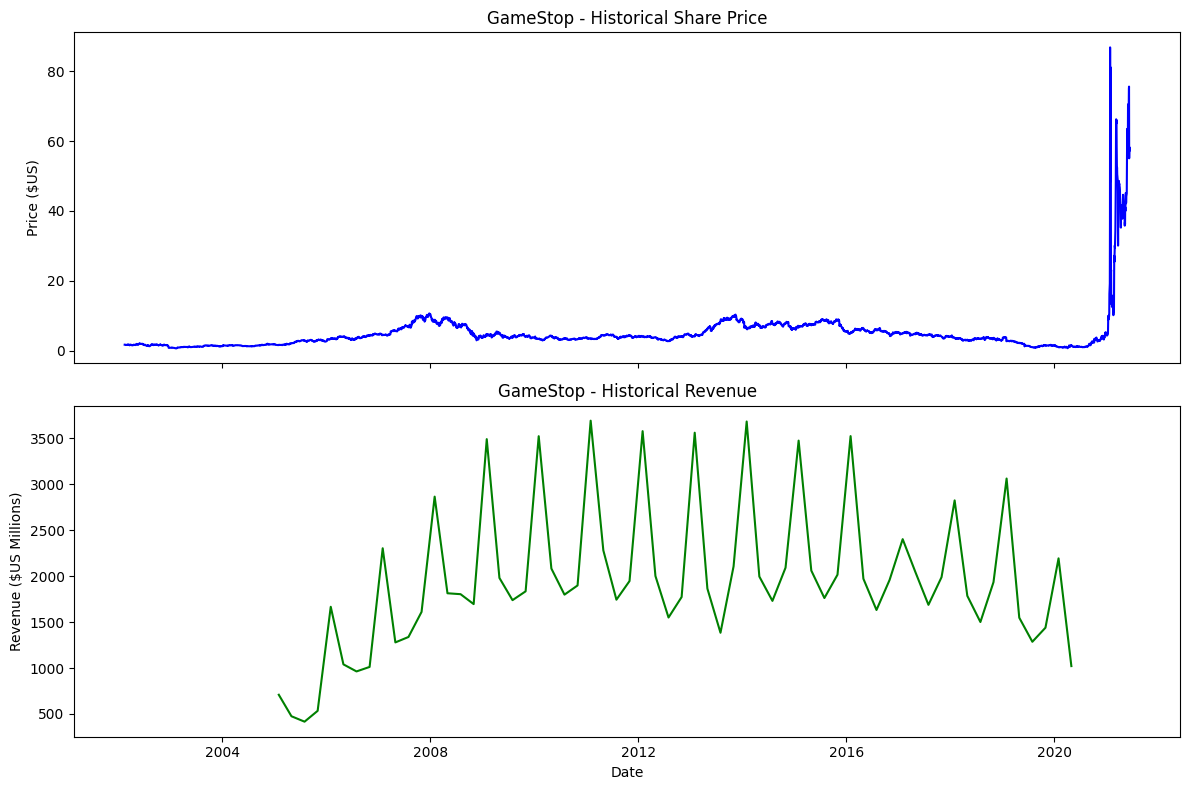

In [58]:
make_graph(gme_data, gme_revenue, 'GameStop')

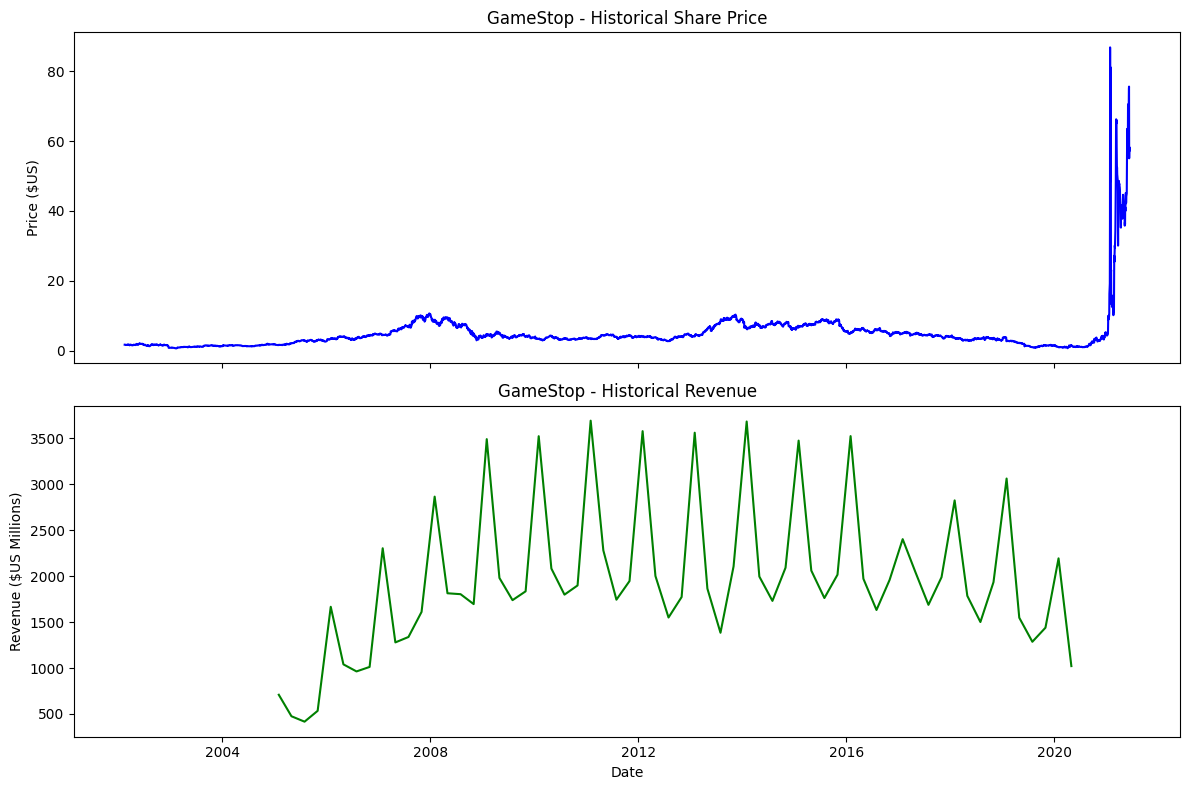

In [59]:
make_graph(gme_data, gme_revenue, 'GameStop')

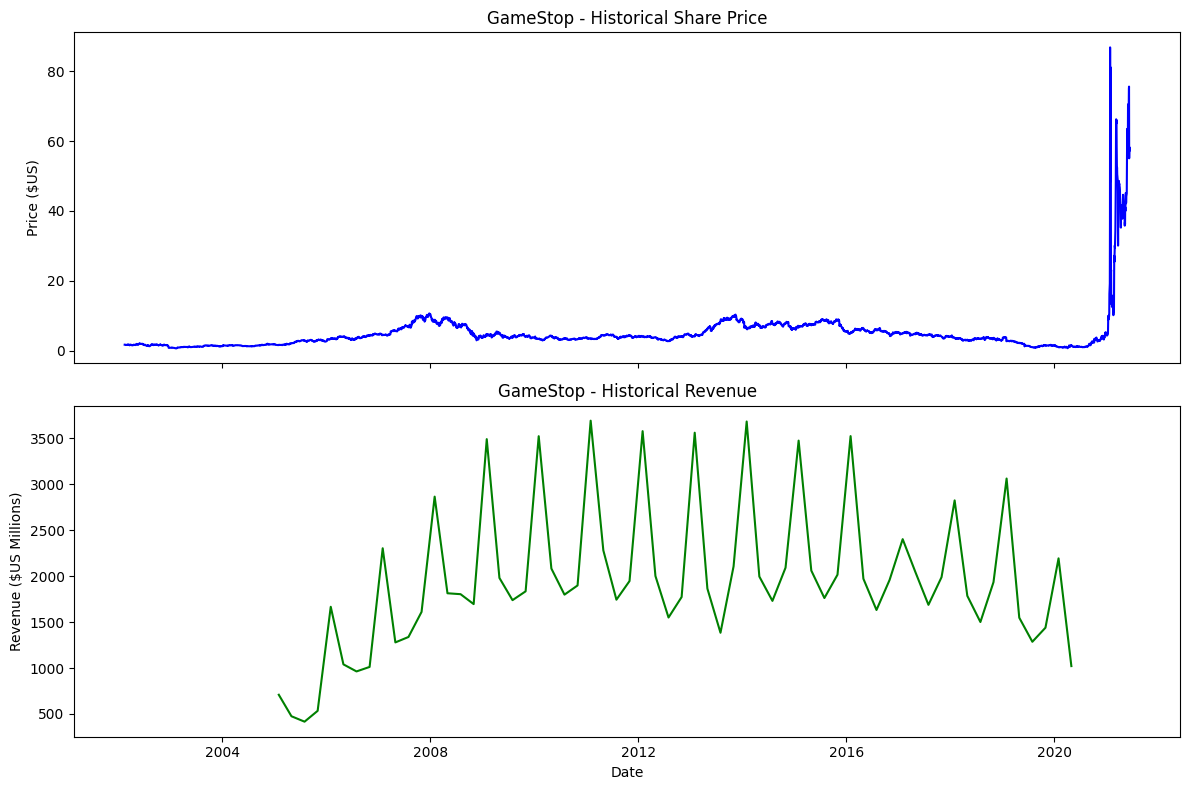

In [60]:
make_graph(gme_data, gme_revenue, 'GameStop')

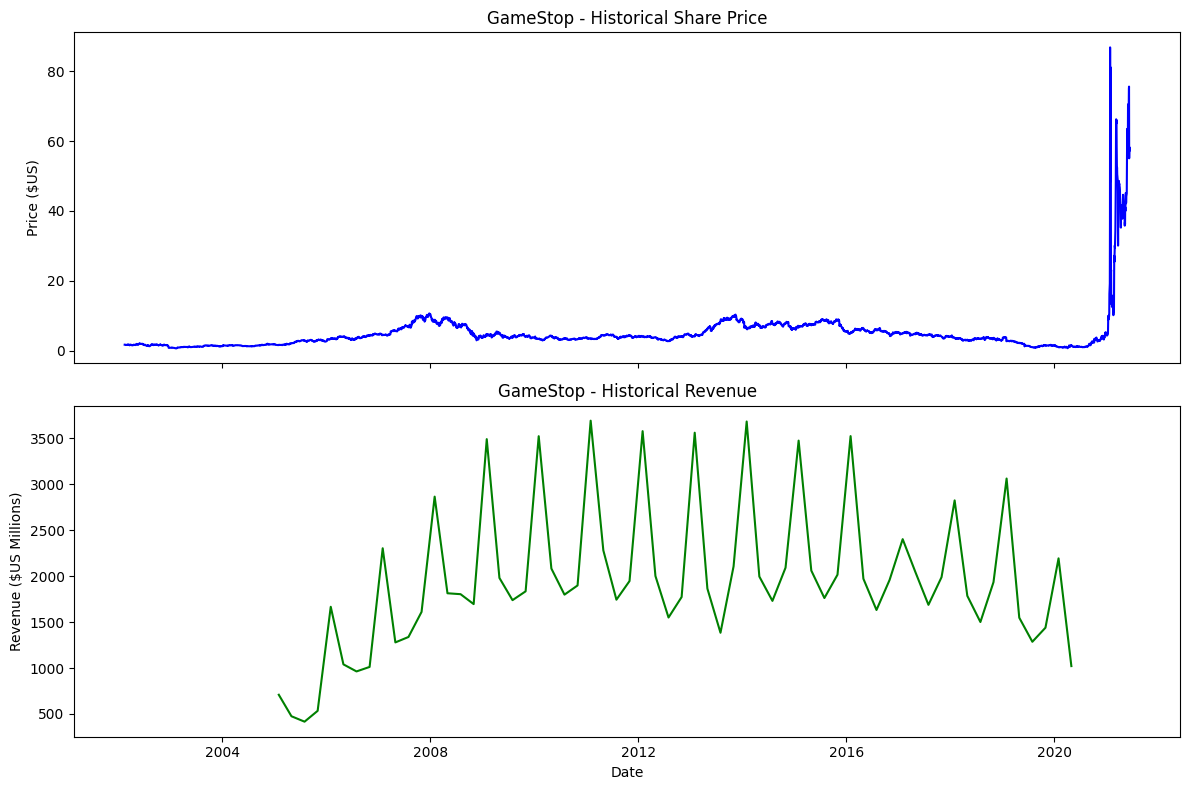

In [61]:
make_graph(gme_data, gme_revenue, 'GameStop')

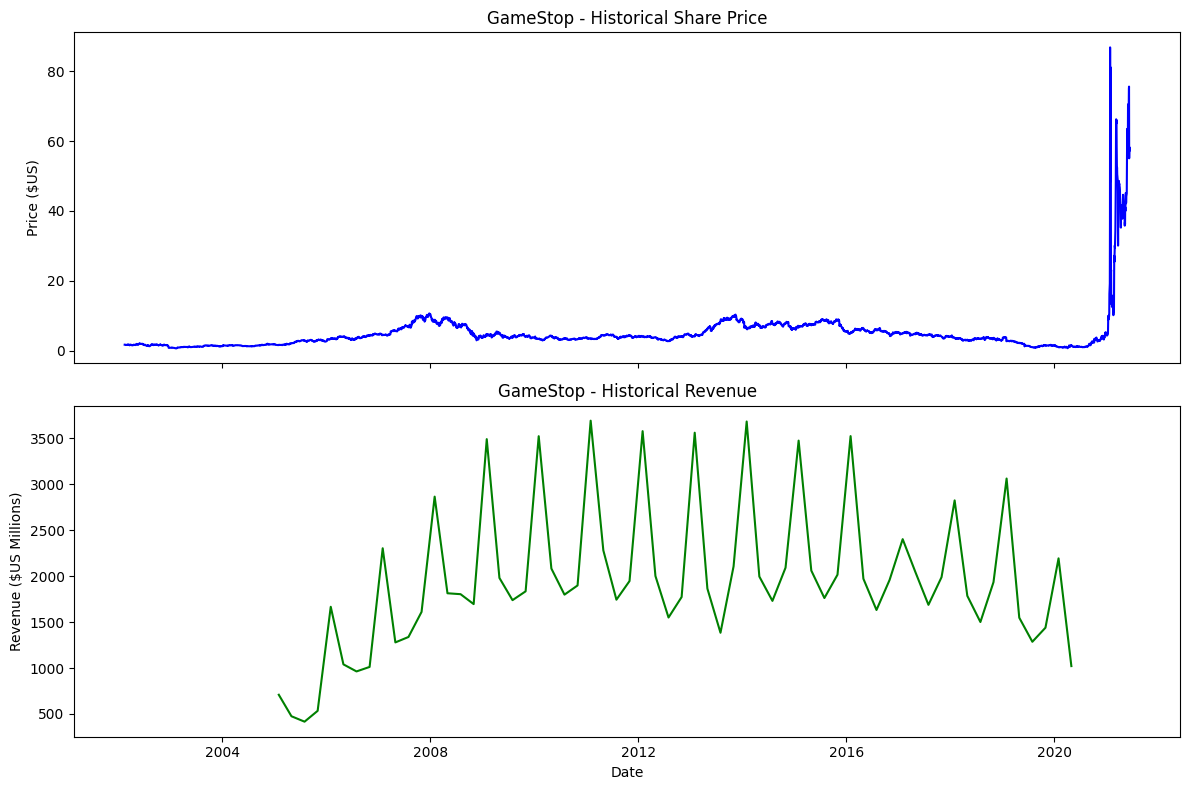

In [62]:
make_graph(gme_data, gme_revenue, 'GameStop')

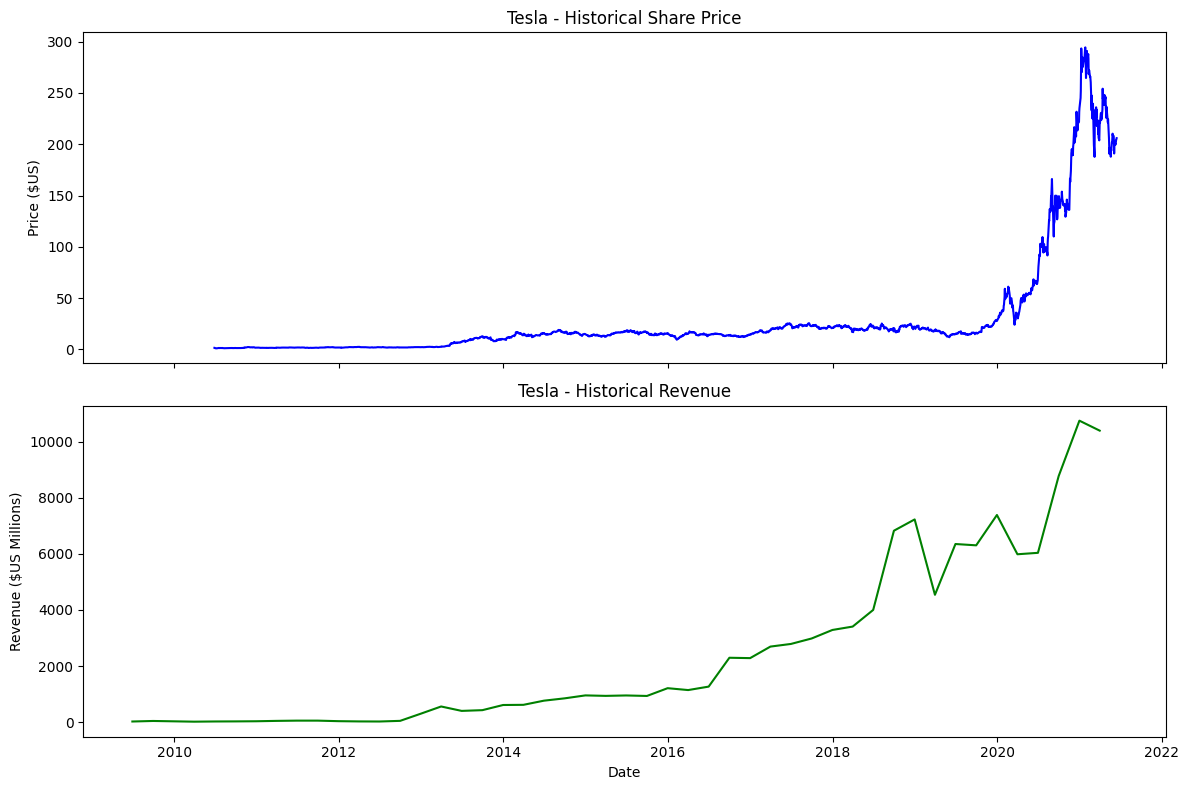

In [63]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

In [55]:
soup = BeautifulSoup(html_data_2, "html.parser")
print("HTML data 2 successfully parsed into a BeautifulSoup object.")

HTML data 2 successfully parsed into a BeautifulSoup object.


In [37]:
display(gme_data.head())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


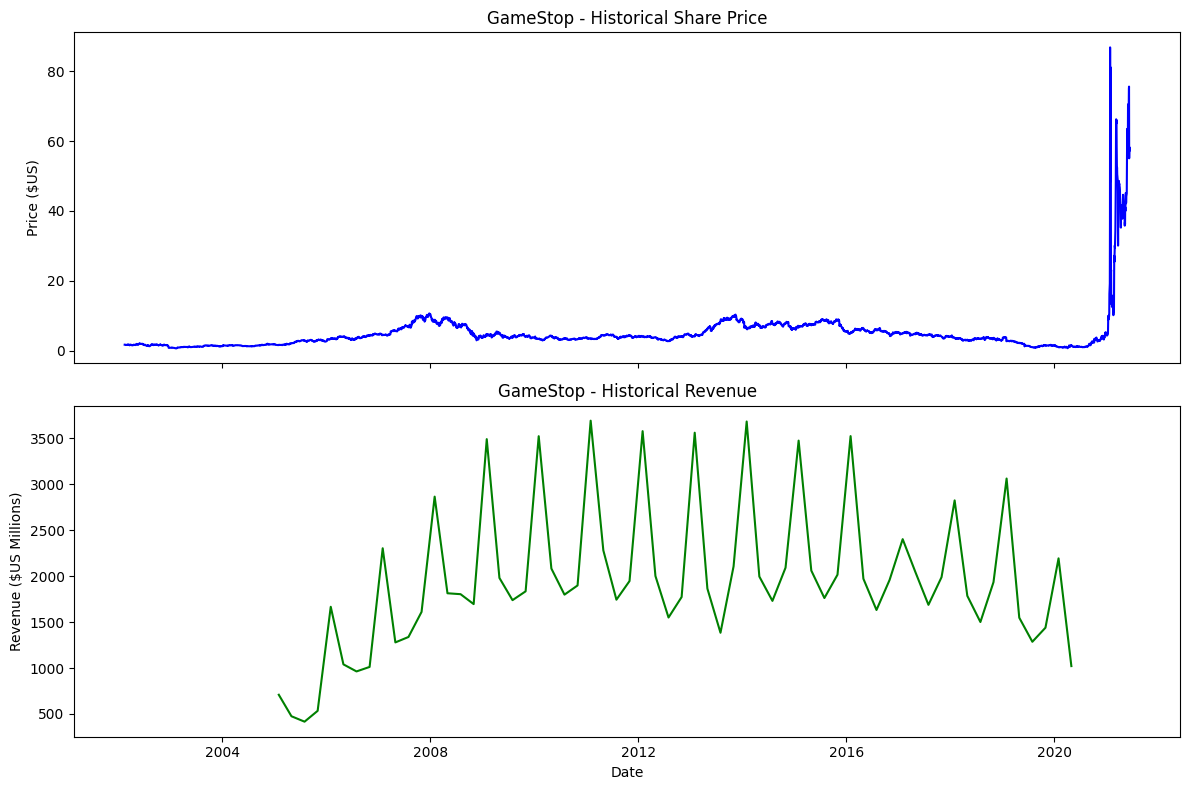

In [64]:
make_graph(gme_data, gme_revenue, 'GameStop')